LinkedIn Job Trend Analysis Tool

Generating sample job data for demonstration...
Created 500 sample job records

Analyzing job market trends...

Generating visualizations...


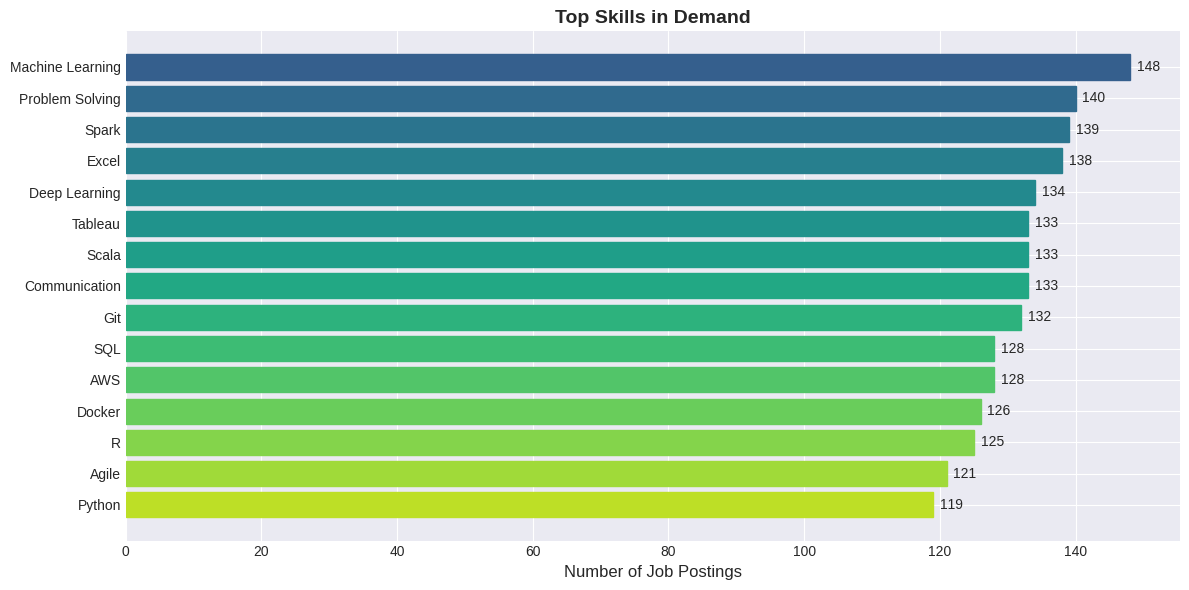

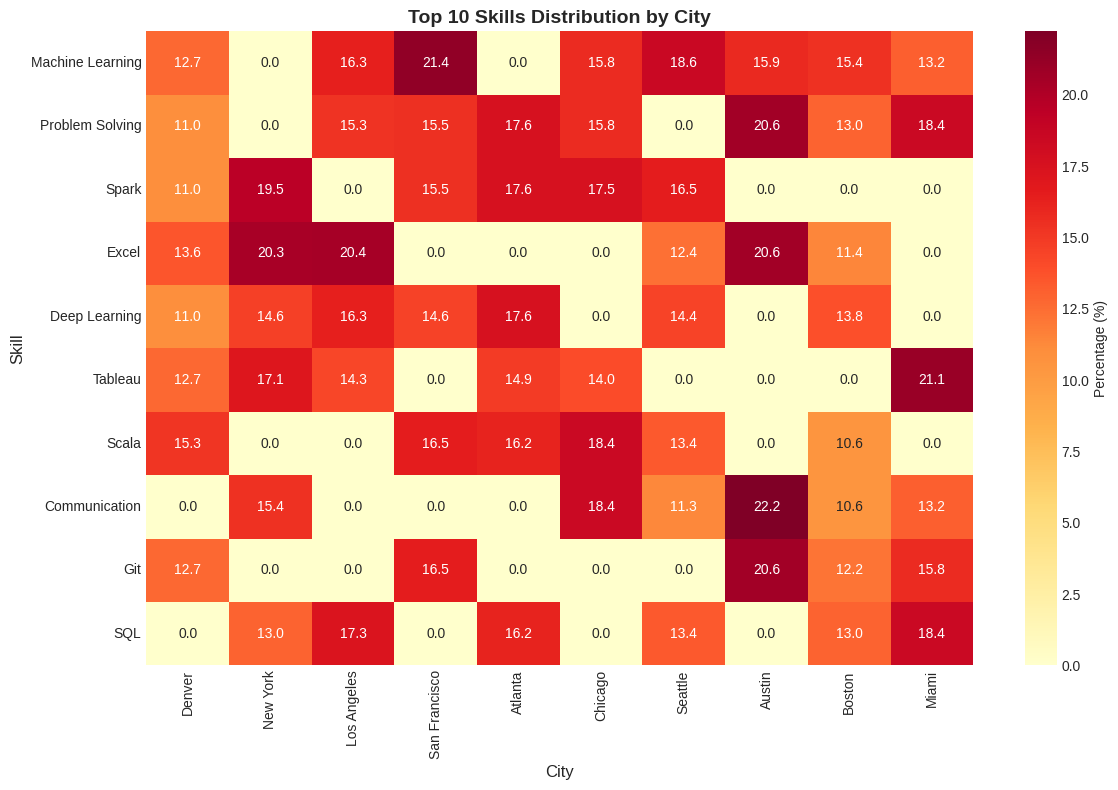

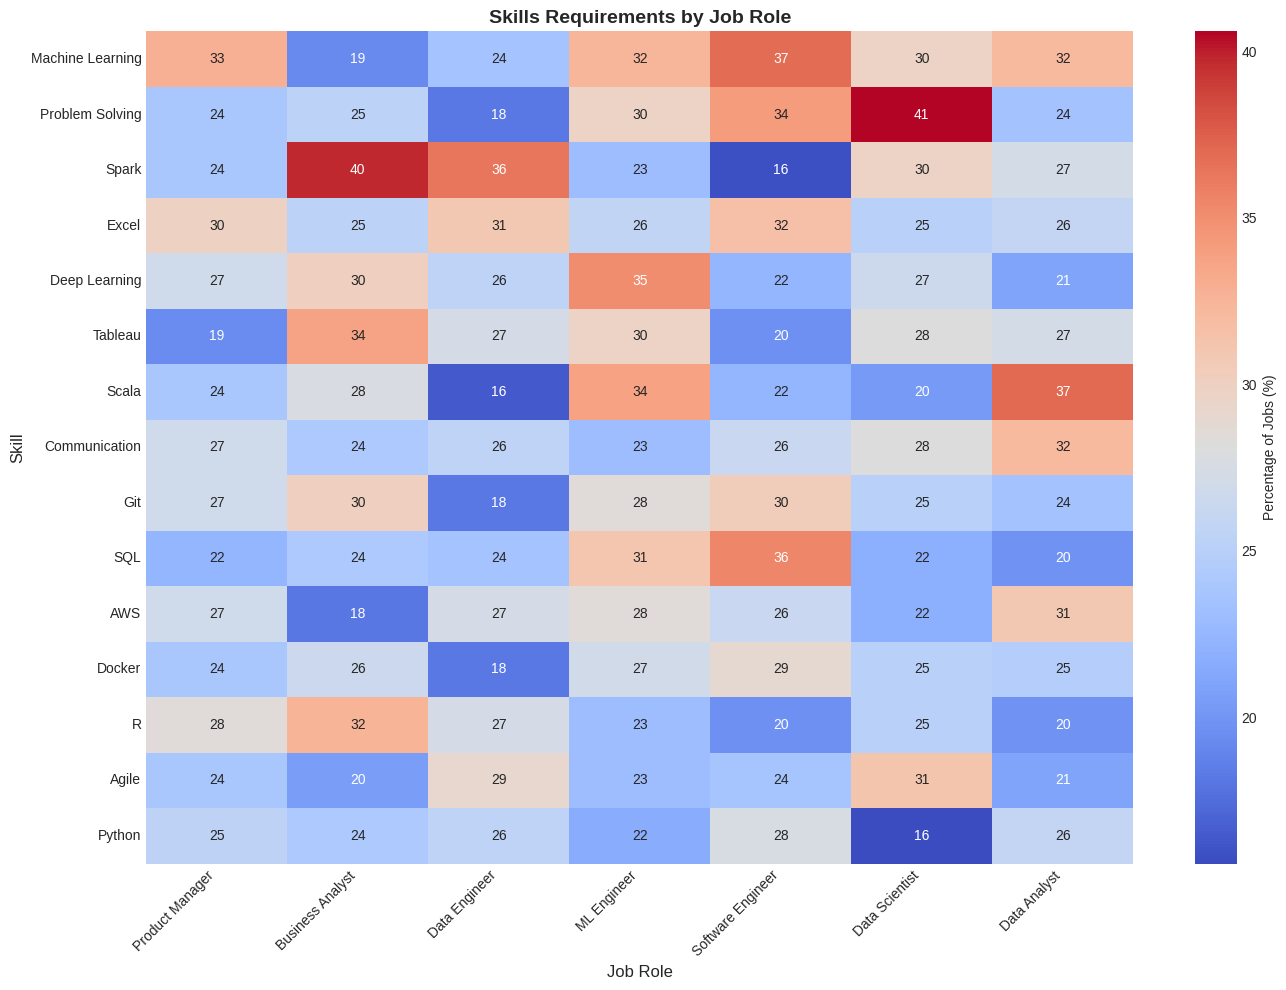

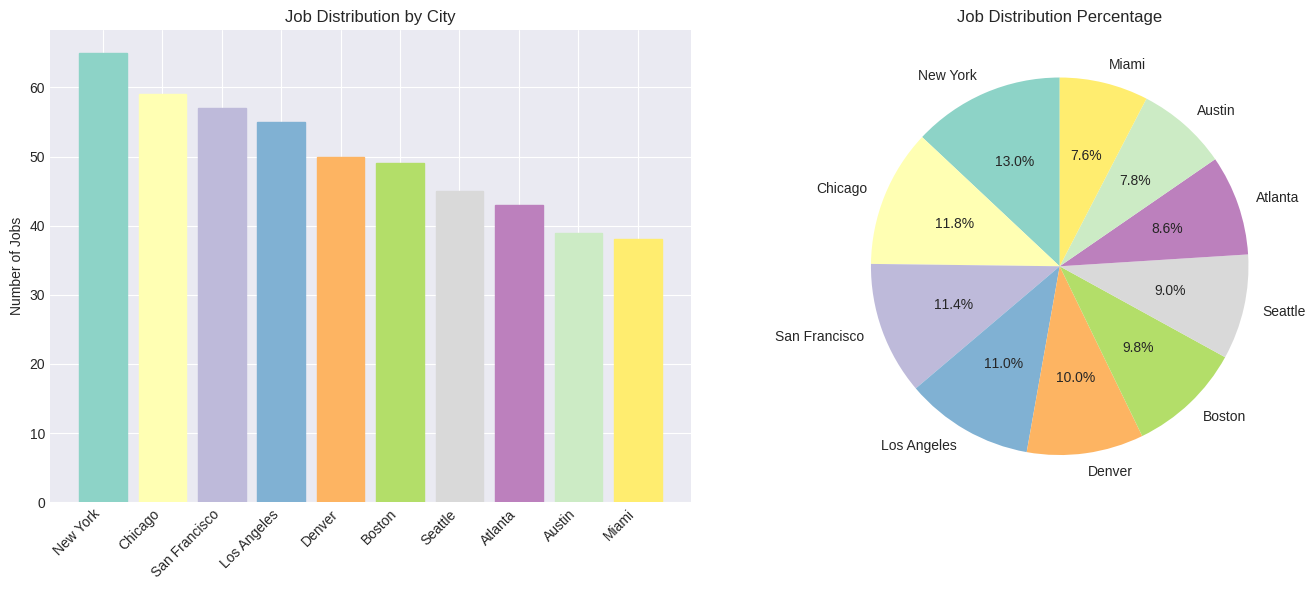


Generating trend analysis report...
JOB MARKET TREND ANALYSIS REPORT

Generated on: 2025-08-31 05:28:53
Total Jobs Analyzed: 500

TOP 10 MOST DEMANDED SKILLS
17. Machine Learning: 148 jobs
4. Problem Solving: 140 jobs
6. Spark: 139 jobs
8. Excel: 138 jobs
11. Deep Learning: 134 jobs
16. Tableau: 133 jobs
7. Scala: 133 jobs
15. Communication: 133 jobs
12. Git: 132 jobs
10. SQL: 128 jobs

TOP HIRING LOCATIONS
New York: 65 jobs (13.0%)
Chicago: 59 jobs (11.8%)
San Francisco: 57 jobs (11.4%)
Los Angeles: 55 jobs (11.0%)
Denver: 50 jobs (10.0%)

JOB ROLES DISTRIBUTION
Business Analyst: 83 jobs (16.6%)
Data Analyst: 81 jobs (16.2%)
Software Engineer: 76 jobs (15.2%)
ML Engineer: 74 jobs (14.8%)
Product Manager: 67 jobs (13.4%)

KEY RECOMMENDATIONS
1. Focus on developing Machine Learning skills - highest demand
2. Consider opportunities in New York - most job openings
3. Business Analyst positions are most abundant
4. Combine technical skills with soft skills for better prospects
5. Cloud pl

In [4]:
"""
LinkedIn Job Trend Analysis - Web Scraping & Analysis Tool
===========================================================
This script provides tools for scraping job data and analyzing skill demand trends.
Note: Direct LinkedIn scraping violates their ToS. This code includes:
1. A demo scraper for other job boards
2. Analysis tools that work with any job data CSV
3. Visualization capabilities for trend analysis
"""

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import time
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# PART 1: WEB SCRAPING MODULE
# ============================================================================

class JobScraper:
    """
    Generic job scraper that can be adapted for various job boards.
    For LinkedIn, use their official API or data export features.
    """

    def __init__(self):
        self.headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
        }
        self.session = requests.Session()
        self.session.headers.update(self.headers)

    def scrape_indeed_jobs(self, query='data scientist', location='New York', pages=2):
        """
        Example scraper for Indeed (public job board)
        Replace with LinkedIn API calls for production use
        """
        jobs = []

        for page in range(pages):
            url = f"https://www.indeed.com/jobs?q={query}&l={location}&start={page*10}"

            try:
                response = self.session.get(url)
                soup = BeautifulSoup(response.content, 'html.parser')

                # Parse job cards (Indeed structure as example)
                job_cards = soup.find_all('div', class_='job_seen_beacon')

                for card in job_cards:
                    job = self.extract_job_details(card)
                    if job:
                        jobs.append(job)

                time.sleep(2)  # Respectful scraping

            except Exception as e:
                print(f"Error scraping page {page}: {e}")

        return pd.DataFrame(jobs)

    def extract_job_details(self, card):
        """Extract job details from a job card"""
        try:
            job = {
                'title': '',
                'company': '',
                'location': '',
                'description': '',
                'skills': [],
                'posted_date': datetime.now().strftime('%Y-%m-%d')
            }

            # Extract title
            title_elem = card.find('h2', class_='jobTitle')
            if title_elem:
                job['title'] = title_elem.get_text(strip=True)

            # Extract company
            company_elem = card.find('span', class_='companyName')
            if company_elem:
                job['company'] = company_elem.get_text(strip=True)

            # Extract location
            location_elem = card.find('div', class_='companyLocation')
            if location_elem:
                job['location'] = location_elem.get_text(strip=True)

            # Extract snippet/description
            snippet_elem = card.find('div', class_='job-snippet')
            if snippet_elem:
                job['description'] = snippet_elem.get_text(strip=True)
                job['skills'] = self.extract_skills(job['description'])

            return job

        except Exception as e:
            print(f"Error extracting job details: {e}")
            return None

    def extract_skills(self, text):
        """Extract skills from job description"""
        # Common tech skills (expand this list based on your needs)
        skill_patterns = [
            'python', 'java', 'javascript', 'sql', 'r', 'scala', 'c\+\+', 'c#',
            'machine learning', 'deep learning', 'data science', 'analytics',
            'tensorflow', 'pytorch', 'scikit-learn', 'pandas', 'numpy',
            'aws', 'azure', 'gcp', 'docker', 'kubernetes', 'git',
            'tableau', 'power bi', 'excel', 'spark', 'hadoop', 'hive',
            'statistics', 'mathematics', 'communication', 'leadership',
            'agile', 'scrum', 'project management', 'problem solving'
        ]

        text_lower = text.lower()
        found_skills = []

        for skill in skill_patterns:
            if re.search(r'\b' + skill + r'\b', text_lower):
                found_skills.append(skill.title())

        return found_skills

# ============================================================================
# PART 2: DATA PROCESSING & ANALYSIS
# ============================================================================

class JobDataAnalyzer:
    """Analyze job data for trends and insights"""

    def __init__(self, df=None):
        self.df = df
        self.skill_demand = {}
        self.location_stats = {}
        self.role_stats = {}

    def load_data(self, filepath):
        """Load job data from CSV"""
        self.df = pd.read_csv(filepath)
        # Convert skills string to list if needed
        if 'skills' in self.df.columns and isinstance(self.df['skills'].iloc[0], str):
            self.df['skills'] = self.df['skills'].apply(eval)
        return self.df

    def create_sample_data(self):
        """Create sample job data for demonstration"""
        np.random.seed(42)

        cities = ['New York', 'San Francisco', 'Seattle', 'Austin', 'Boston',
                  'Chicago', 'Los Angeles', 'Denver', 'Atlanta', 'Miami']

        roles = ['Data Scientist', 'Data Analyst', 'ML Engineer', 'Data Engineer',
                 'Business Analyst', 'Software Engineer', 'Product Manager']

        all_skills = ['Python', 'SQL', 'Machine Learning', 'R', 'Tableau', 'Excel',
                      'Statistics', 'Deep Learning', 'AWS', 'Spark', 'Docker',
                      'Kubernetes', 'Java', 'Scala', 'PowerBI', 'Git', 'Agile',
                      'Communication', 'Leadership', 'Problem Solving']

        # Generate sample data
        jobs = []
        for _ in range(500):
            job = {
                'title': np.random.choice(roles),
                'company': f"Company_{np.random.randint(1, 100)}",
                'location': np.random.choice(cities),
                'skills': list(np.random.choice(all_skills,
                              size=np.random.randint(3, 8), replace=False)),
                'salary_min': np.random.randint(60000, 150000),
                'salary_max': np.random.randint(100000, 250000),
                'posted_date': pd.Timestamp.now() - pd.Timedelta(days=np.random.randint(0, 30))
            }
            jobs.append(job)

        self.df = pd.DataFrame(jobs)
        return self.df

    def analyze_skill_demand(self):
        """Analyze overall skill demand"""
        all_skills = []
        for skills in self.df['skills']:
            if isinstance(skills, list):
                all_skills.extend(skills)

        skill_counts = Counter(all_skills)
        self.skill_demand = pd.DataFrame(skill_counts.items(),
                                         columns=['Skill', 'Count'])
        self.skill_demand = self.skill_demand.sort_values('Count', ascending=False)
        return self.skill_demand

    def analyze_skills_by_city(self):
        """Analyze top skills by city"""
        city_skills = {}

        for city in self.df['location'].unique():
            city_jobs = self.df[self.df['location'] == city]
            city_all_skills = []

            for skills in city_jobs['skills']:
                if isinstance(skills, list):
                    city_all_skills.extend(skills)

            skill_counts = Counter(city_all_skills)
            city_skills[city] = dict(skill_counts.most_common(10))

        return city_skills

    def analyze_skills_by_role(self):
        """Analyze skills by job role"""
        role_skills = {}

        for role in self.df['title'].unique():
            role_jobs = self.df[self.df['title'] == role]
            role_all_skills = []

            for skills in role_jobs['skills']:
                if isinstance(skills, list):
                    role_all_skills.extend(skills)

            skill_counts = Counter(role_all_skills)
            role_skills[role] = dict(skill_counts.most_common(10))

        return role_skills

    def create_skill_role_matrix(self):
        """Create a matrix of skills vs roles"""
        roles = self.df['title'].unique()
        all_skills = set()

        for skills in self.df['skills']:
            if isinstance(skills, list):
                all_skills.update(skills)

        top_skills = self.analyze_skill_demand().head(15)['Skill'].tolist()

        matrix = pd.DataFrame(0, index=top_skills, columns=roles)

        for _, row in self.df.iterrows():
            role = row['title']
            skills = row['skills']
            if isinstance(skills, list):
                for skill in skills:
                    if skill in top_skills:
                        matrix.loc[skill, role] += 1

        # Normalize by role count
        for role in roles:
            role_count = len(self.df[self.df['title'] == role])
            if role_count > 0:
                matrix[role] = (matrix[role] / role_count * 100).round(1)

        return matrix

# ============================================================================
# PART 3: VISUALIZATION MODULE
# ============================================================================

class JobTrendVisualizer:
    """Create visualizations for job trend analysis"""

    def __init__(self, analyzer):
        self.analyzer = analyzer
        plt.style.use('seaborn-v0_8-darkgrid')

    def plot_top_skills(self, top_n=15):
        """Plot top N most demanded skills"""
        skill_demand = self.analyzer.analyze_skill_demand().head(top_n)

        fig, ax = plt.subplots(figsize=(12, 6))
        bars = ax.barh(skill_demand['Skill'], skill_demand['Count'])

        # Color gradient
        colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(bars)))
        for bar, color in zip(bars, colors):
            bar.set_color(color)

        ax.set_xlabel('Number of Job Postings', fontsize=12)
        ax.set_title('Top Skills in Demand', fontsize=14, fontweight='bold')
        ax.invert_yaxis()

        # Add value labels
        for i, (skill, count) in enumerate(zip(skill_demand['Skill'], skill_demand['Count'])):
            ax.text(count + 1, i, str(count), va='center')

        plt.tight_layout()
        return fig

    def plot_city_skill_heatmap(self):
        """Create heatmap of top skills by city"""
        city_skills = self.analyzer.analyze_skills_by_city()

        # Get top 10 overall skills
        top_skills = self.analyzer.analyze_skill_demand().head(10)['Skill'].tolist()
        cities = list(city_skills.keys())

        # Create matrix
        matrix = pd.DataFrame(0, index=top_skills, columns=cities)

        for city, skills in city_skills.items():
            for skill, count in skills.items():
                if skill in top_skills:
                    matrix.loc[skill, city] = count

        # Normalize by city
        matrix = matrix.div(matrix.sum(axis=0), axis=1) * 100

        # Create heatmap
        fig, ax = plt.subplots(figsize=(12, 8))
        sns.heatmap(matrix, annot=True, fmt='.1f', cmap='YlOrRd',
                    cbar_kws={'label': 'Percentage (%)'}, ax=ax)

        ax.set_title('Top 10 Skills Distribution by City', fontsize=14, fontweight='bold')
        ax.set_xlabel('City', fontsize=12)
        ax.set_ylabel('Skill', fontsize=12)

        plt.tight_layout()
        return fig

    def plot_skill_role_matrix(self):
        """Plot skill vs role matrix"""
        matrix = self.analyzer.create_skill_role_matrix()

        fig, ax = plt.subplots(figsize=(14, 10))
        sns.heatmap(matrix, annot=True, fmt='.0f', cmap='coolwarm',
                    cbar_kws={'label': 'Percentage of Jobs (%)'}, ax=ax)

        ax.set_title('Skills Requirements by Job Role', fontsize=14, fontweight='bold')
        ax.set_xlabel('Job Role', fontsize=12)
        ax.set_ylabel('Skill', fontsize=12)

        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        return fig

    def plot_location_distribution(self):
        """Plot job distribution by location"""
        location_counts = self.analyzer.df['location'].value_counts().head(10)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Bar chart
        bars = ax1.bar(range(len(location_counts)), location_counts.values)
        colors = plt.cm.Set3(np.linspace(0, 1, len(bars)))
        for bar, color in zip(bars, colors):
            bar.set_color(color)

        ax1.set_xticks(range(len(location_counts)))
        ax1.set_xticklabels(location_counts.index, rotation=45, ha='right')
        ax1.set_ylabel('Number of Jobs')
        ax1.set_title('Job Distribution by City')

        # Pie chart
        ax2.pie(location_counts.values, labels=location_counts.index,
                autopct='%1.1f%%', colors=colors, startangle=90)
        ax2.set_title('Job Distribution Percentage')

        plt.tight_layout()
        return fig

    def generate_trend_report(self):
        """Generate comprehensive trend analysis report"""
        report = []
        report.append("=" * 60)
        report.append("JOB MARKET TREND ANALYSIS REPORT")
        report.append("=" * 60)
        report.append(f"\nGenerated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        report.append(f"Total Jobs Analyzed: {len(self.analyzer.df)}")

        # Top Skills
        report.append("\n" + "=" * 60)
        report.append("TOP 10 MOST DEMANDED SKILLS")
        report.append("=" * 60)
        top_skills = self.analyzer.analyze_skill_demand().head(10)
        for idx, row in top_skills.iterrows():
            report.append(f"{idx+1}. {row['Skill']}: {row['Count']} jobs")

        # Location Analysis
        report.append("\n" + "=" * 60)
        report.append("TOP HIRING LOCATIONS")
        report.append("=" * 60)
        location_counts = self.analyzer.df['location'].value_counts().head(5)
        for location, count in location_counts.items():
            percentage = (count / len(self.analyzer.df)) * 100
            report.append(f"{location}: {count} jobs ({percentage:.1f}%)")

        # Role Analysis
        report.append("\n" + "=" * 60)
        report.append("JOB ROLES DISTRIBUTION")
        report.append("=" * 60)
        role_counts = self.analyzer.df['title'].value_counts().head(5)
        for role, count in role_counts.items():
            percentage = (count / len(self.analyzer.df)) * 100
            report.append(f"{role}: {count} jobs ({percentage:.1f}%)")

        # Recommendations
        report.append("\n" + "=" * 60)
        report.append("KEY RECOMMENDATIONS")
        report.append("=" * 60)

        top_skill = top_skills.iloc[0]['Skill']
        top_location = location_counts.index[0]
        top_role = role_counts.index[0]

        report.append(f"1. Focus on developing {top_skill} skills - highest demand")
        report.append(f"2. Consider opportunities in {top_location} - most job openings")
        report.append(f"3. {top_role} positions are most abundant")
        report.append("4. Combine technical skills with soft skills for better prospects")
        report.append("5. Cloud platforms (AWS, Azure, GCP) are increasingly important")

        return "\n".join(report)

# ============================================================================
# PART 4: EXCEL EXPORT MODULE
# ============================================================================

def export_to_excel(analyzer, filename='job_analysis_report.xlsx'):
    """Export analysis results to Excel with multiple sheets"""

    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        # Raw data
        analyzer.df.to_excel(writer, sheet_name='Raw Data', index=False)

        # Skill demand
        skill_demand = analyzer.analyze_skill_demand()
        skill_demand.to_excel(writer, sheet_name='Skill Demand', index=False)

        # Skills by city
        city_skills = analyzer.analyze_skills_by_city()
        city_df = pd.DataFrame(city_skills).fillna(0)
        city_df.to_excel(writer, sheet_name='Skills by City')

        # Skills by role
        role_skills = analyzer.analyze_skills_by_role()
        role_df = pd.DataFrame(role_skills).fillna(0)
        role_df.to_excel(writer, sheet_name='Skills by Role')

        # Skill-Role Matrix
        matrix = analyzer.create_skill_role_matrix()
        matrix.to_excel(writer, sheet_name='Skill-Role Matrix')

    print(f"Analysis exported to {filename}")

# ============================================================================
# MAIN EXECUTION
# ============================================================================

def main():
    """Main execution function"""

    print("LinkedIn Job Trend Analysis Tool")
    print("=" * 60)

    # Initialize components
    scraper = JobScraper()
    analyzer = JobDataAnalyzer()

    # Option 1: Use sample data for demonstration
    print("\nGenerating sample job data for demonstration...")
    df = analyzer.create_sample_data()
    print(f"Created {len(df)} sample job records")

    # Option 2: Load from CSV (if you have LinkedIn data export)
    # analyzer.load_data('/content/job_dataset.csv')

    # Option 3: Scrape from job boards (not LinkedIn due to ToS)
    # df = scraper.scrape_indeed_jobs('data scientist', 'New York', pages=5)
    # analyzer.df = df

    # Perform analysis
    print("\nAnalyzing job market trends...")

    # Initialize visualizer
    visualizer = JobTrendVisualizer(analyzer)

    # Generate visualizations
    print("\nGenerating visualizations...")

    # 1. Top skill_raws
    fig1 = visualizer.plot_top_skills()
    plt.savefig('top_skills.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 2. City-Skill Heatmap
    fig2 = visualizer.plot_city_skill_heatmap()
    plt.savefig('city_skill_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 3. Skill-Role Matrix
    fig3 = visualizer.plot_skill_role_matrix()
    plt.savefig('skill_role_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 4. Location Distribution
    fig4 = visualizer.plot_location_distribution()
    plt.savefig('location_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Generate text report
    print("\nGenerating trend analysis report...")
    report = visualizer.generate_trend_report()
    print(report)

    # Save report to file
    with open('trend_analysis_report.txt', 'w') as f:
        f.write(report)

    # Export to Excel
    print("\nExporting results to Excel...")
    export_to_excel(analyzer, 'job_analysis_report.xlsx')

    print("\n" + "=" * 60)
    print("Analysis complete! Files generated:")
    print("- top_skills.png")
    print("- city_skill_heatmap.png")
    print("- skill_role_matrix.png")
    print("- location_distribution.png")
    print("- trend_analysis_report.txt")
    print("- job_analysis_report.xlsx")

if __name__ == "__main__":
    main()